# TensorFlow Data Structures

In [1]:
import tensorflow as tf
from tensorflow.python.framework import ops
import numpy as np
ops.reset_default_graph()

In [2]:
sess = tf.Session()

In [3]:
my_tensor = tf.zeros([1,20])

In [5]:
sess.run(my_tensor)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [7]:
my_var = tf.Variable(tf.zeros([1,20]))

In [9]:
#make sure var is initialized
sess.run(my_var.initializer)
sess.run(my_var)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [10]:
row_dim = 2
col_dim = 3

In [11]:
zero_var = tf.Variable(tf.zeros([row_dim, col_dim]))
ones_var = tf.Variable(tf.ones([row_dim, col_dim]))

In [12]:
sess.run(zero_var.initializer)
sess.run(ones_var.initializer)
print(sess.run(zero_var))
print(sess.run(ones_var))

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


In [13]:
#create tensor based on the shape of another tensor with the built in function
zero_similar = tf.Variable(tf.zeros_like(zero_var))
ones_similar = tf.Variable(tf.ones_like(ones_var))
sess.run(zero_similar.initializer)
sess.run(ones_similar.initializer)
print(sess.run(ones_similar))
print(sess.run(zero_similar))

[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [16]:
linear_var = tf.Variable(tf.linspace(start=0.0, stop=1.0, num=3))
sequence_var = tf.Variable(tf.range(start=6, limit=15, delta=3))
sess.run(linear_var.initializer)
sess.run(sequence_var.initializer)
print(sess.run(linear_var))
print(sess.run(sequence_var))

[0.  0.5 1. ]
[ 6  9 12]


In [18]:
#Create tensor values as normal and uniform random variables:
rnorm_var = tf.random_normal([row_dim, col_dim], mean=0.0, stddev=1.0)
runif_var = tf.random_uniform([row_dim, col_dim], minval=0, maxval=4)
print(sess.run(rnorm_var))
print(sess.run(runif_var))

[[-0.9676583  -0.23629433  0.45395404]
 [-0.9532722  -1.4106219  -0.39849392]]
[[2.9825654 0.6184511 2.266016 ]
 [3.0036502 3.6456199 2.8621664]]


In [21]:
#In order to see the creation of variables in tensorboard we reset the computational graph:

ops.reset_default_graph()
sess = tf.Session()
my_var = tf.Variable(tf.zeros([1,20]))
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter("./logs", graph=sess.graph)
initialize_op = tf.global_variables_initializer()
sess.run(initialize_op)

Using placeholders

In [22]:
ops.reset_default_graph()
sess = tf.Session()

In [24]:
x = tf.placeholder(tf.float32, shape=(4,4))

In [25]:
rand_array = np.random.rand(4,4)

#tf.identity: Return a tensor with the same shape and contents as input.
y = tf.identity(x)
#feed_dict is used to feed tha value of X into the graph
print(sess.run(y, feed_dict={x:rand_array}))

[[0.7937314  0.5384239  0.16065046 0.27992713]
 [0.42464265 0.10202765 0.44388276 0.8740751 ]
 [0.34271106 0.52961576 0.29644653 0.03028145]
 [0.3741088  0.53108656 0.90411836 0.16420925]]


In [26]:
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter("./logs", graph=sess.graph)

Working with Matrices

In [27]:
ops.reset_default_graph()
sess = tf.Session()

In [28]:
#we can create matrices in many ways:
#from one dim array:

identity_matrix = tf.diag([1.0, 1.0, 1.0])
print(sess.run(identity_matrix))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [29]:
A = tf.truncated_normal([2,3])
print(sess.run(A))

[[ 0.49151346  0.5806406  -0.9260295 ]
 [-0.30760834 -1.0968556   1.4410782 ]]


In [30]:
#creates matrix filled by constants
B = tf.fill([2,3], 5.0)
print(sess.run(B))

[[5. 5. 5.]
 [5. 5. 5.]]


In [31]:
#random matrix
C = tf.random_uniform([3,2])
print(sess.run(C))

[[0.5839764  0.69823027]
 [0.86756706 0.10749102]
 [0.5012522  0.6233132 ]]


In [32]:
D = tf.convert_to_tensor(np.array([[1., 2., 3.], [-3., -7., -1.], [0., 5., -2.]]))
print(sess.run(D))

[[ 1.  2.  3.]
 [-3. -7. -1.]
 [ 0.  5. -2.]]


In [33]:
print(sess.run(A+B))
print(sess.run(B-B))

[[4.546359  5.4422226 4.146494 ]
 [3.0918226 4.7610984 5.3000364]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [34]:
print(sess.run(tf.matmul(B, identity_matrix)))

[[5. 5. 5.]
 [5. 5. 5.]]


In [35]:
print(sess.run(tf.transpose(C)))
print(sess.run(tf.matrix_determinant(D)))
print(sess.run(tf.matrix_inverse(D)))

[[0.79467726 0.87793064 0.43622077]
 [0.11861241 0.9717778  0.2571411 ]]
-37.99999999999999
[[-0.5        -0.5        -0.5       ]
 [ 0.15789474  0.05263158  0.21052632]
 [ 0.39473684  0.13157895  0.02631579]]


In [36]:
print(sess.run(tf.cholesky(identity_matrix)))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [37]:
eigenvalues, eigenvectors = sess.run(tf.self_adjoint_eig(D))
print(eigenvalues)
print(eigenvectors)

[-10.65907521  -0.22750691   2.88658212]
[[ 0.21749542  0.63250104 -0.74339638]
 [ 0.84526515  0.2587998   0.46749277]
 [-0.4880805   0.73004459  0.47834331]]


Declaring Operations

In [38]:
#Difference between division operators:
print(sess.run(tf.div(3,4)))
print(sess.run(tf.truediv(3,4)))
print(sess.run(tf.floordiv(3.0, 4.0)))

0
0.75
0.0


In [39]:
print(sess.run(tf.mod(22.0, 5.0)))

2.0


In [41]:
print(sess.run(tf.cross([1.0, 2.0, 1.0], [5.6, 6.0, 1.0])))

[-4.   4.6 -5.2]


In [42]:
print(sess.run(tf.sin(3.1)))
print(sess.run(tf.cos(3.1)))
print(sess.run(tf.div(tf.sin(3.1/4.), tf.cos(3.1/4.))))

0.04158076
-0.99913514
0.9794169


In [43]:
#custom function:
test_nums = range(15)

def custom_polynomial(x_val):
    return(tf.subtract(3 * tf.square(x_val), x_val) + 10)
print(sess.run(custom_polynomial(11)))

362


Implementing Activation Functions

In [96]:
x_vals = np.linspace(start=-10., stop=10., num=100)

In [97]:
#relu: most commmon way to introduce non linearity. Continuous but not smooth

print(sess.run(tf.nn.relu([-3., 3., 10.])))
y_relu = sess.run(tf.nn.relu(x_vals))

[ 0.  3. 10.]


In [98]:
#version of hard sigmoid; computationally faster and prevents vanishing/exploding gradients

print(sess.run(tf.nn.relu6([-3., 3., 10.])))
y_relu6 = sess.run(tf.nn.relu6(x_vals))

[0. 3. 6.]


In [99]:
#aka logistic funtion: 1/1+()
#has tendency to zero out the backprop terms during training
print(sess.run(tf.nn.sigmoid([-1.,0.,1.])))
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))

[0.26894143 0.5        0.7310586 ]


In [100]:
#similarto sigmoid but reange is between -1 and 1
print(sess.run(tf.nn.tanh([-1.,0.,1.])))
y_tanh = sess.run(tf.nn.tanh(x_vals))

[-0.7615942  0.         0.7615942]


In [101]:
#also used as activation function. supposed to be continuous approx to sine function

print(sess.run(tf.nn.softsign([-1.,0.,1.])))
y_softsign = sess.run(tf.nn.softsign(x_vals))

[-0.5  0.   0.5]


In [102]:
#smooth version of relu

print(sess.run(tf.nn.softplus([-1.,0.,1.])))
y_softplus = sess.run(tf.nn.softplus(x_vals))

[0.31326166 0.6931472  1.3132616 ]


In [103]:
#exponential linear unit. 

print(sess.run(tf.nn.elu([-1., 0., 1.])))
y_elu = sess.run(tf.nn.elu(x_vals))

[-0.63212055  0.          1.        ]


In [104]:
import matplotlib.pyplot as plt

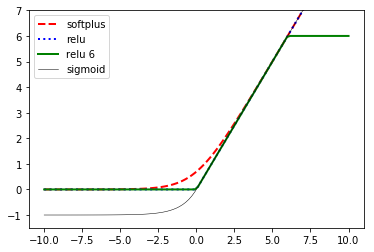

In [105]:
plt.plot(x_vals, y_softplus, 'r--', label='softplus', linewidth=2)
plt.plot(x_vals, y_relu, 'b:', label='relu', linewidth=2)
plt.plot(x_vals, y_relu6, 'g-', label='relu 6', linewidth=2)
plt.plot(x_vals, y_elu, 'k-', label='sigmoid', linewidth=0.5)
plt.legend(loc='upper left')
plt.ylim([-1.5,7])
plt.show()

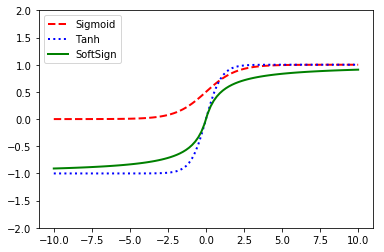

In [107]:
plt.plot(x_vals, y_sigmoid, 'r--', label='Sigmoid', linewidth=2)
plt.plot(x_vals, y_tanh, 'b:', label='Tanh', linewidth=2)
plt.plot(x_vals, y_softsign, 'g-', label='SoftSign', linewidth=2)
plt.legend(loc='upper left')
plt.ylim([-2,2])
plt.show()

Workign with Data Souces

In [108]:
ops.reset_default_graph()
sess = tf.Session()

In [109]:
from sklearn.datasets import load_iris

iris = load_iris()